In [15]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.insert(0,'/home/misa/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm
import os
import qml

In [16]:
def plot_alchpots(com, alchpots):
    plt.rcParams['font.size'] = 20
    fig, ax = plt.subplots(1,1)
    color_dict = {1.0:'tab:blue', 6.0:'tab:green', 7.0:'tab:orange', 8.0:'tab:red'}
    for i in range(len(com.nuclear_charges)):
    #     if com.nuclear_charges[i] == 1:
    #         ax.plot(lam_vals, alchpots[:,i], '-o', color=color_dict[com.nuclear_charges[i]])
        ax.plot(alchpots[:,i], '-o',label = com.nuclear_charges[i], color=color_dict[com.nuclear_charges[i]])
    #         ax.plot(lam_vals, alchpots_long[1:,i]+lam_vals*12, '--')
    #         ax.plot(lam_vals, alchpots_atom[1:,i]+lam_vals*12, '-*')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.set_xlabel(r'$\lambda$')
    ax.set_ylabel(r'$\mu_I$ (Ha)')

In [17]:
data_paths = uqm.read_list('/home/misa/projects/Atomic-Energies/data/vacuum_reference/test_run.txt')

In [20]:
alchpots = dict()
compounds = dict()
lam_vals = dict()
for p in data_paths[:-1]:
    key = p.split('/')[-1]
    alchpots[key] = np.load(os.path.join(p, 'alchpots.npy'))
    compounds[key] = qml.Compound(xyz=os.path.join(p, key+'.xyz'))
    lam_vals[key] = np.loadtxt(os.path.join(p, 'lam_vals.txt'))

In [25]:
lam_vals['dsgdb9nsd_001212']*52

array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26.,
       28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.])

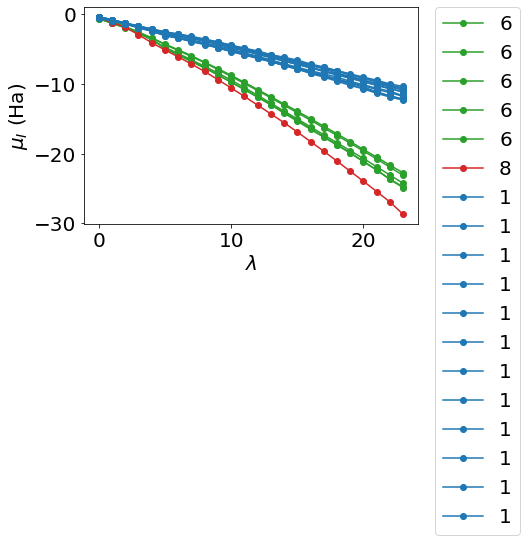

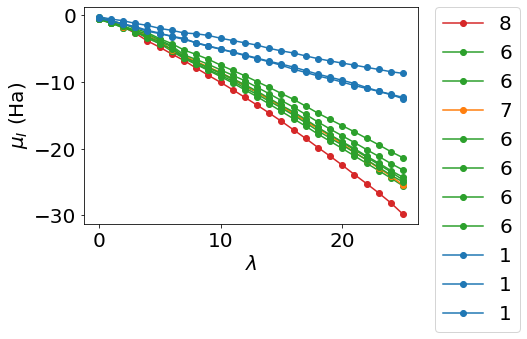

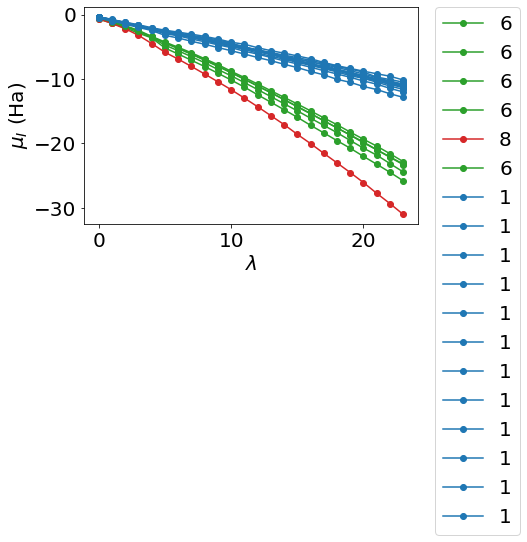

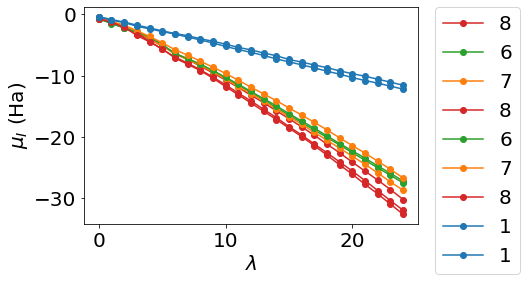

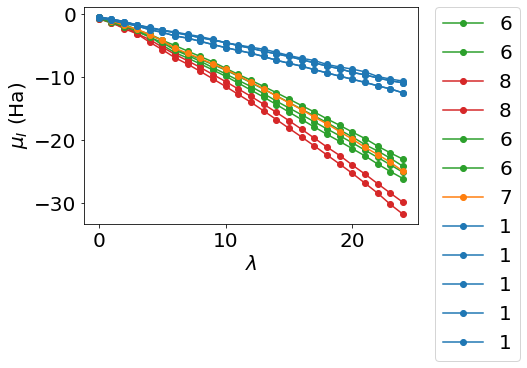

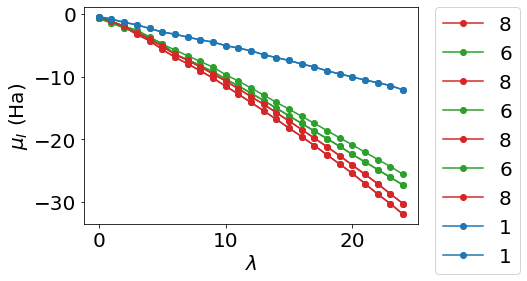

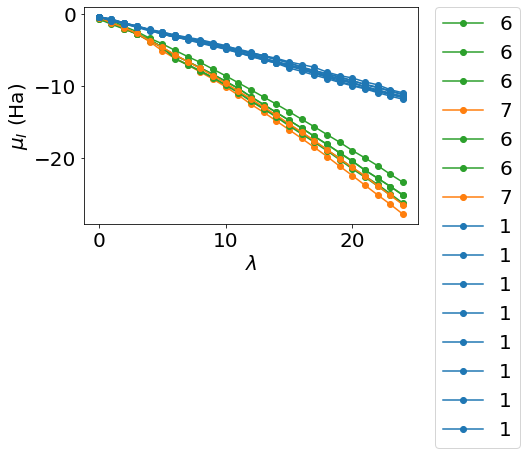

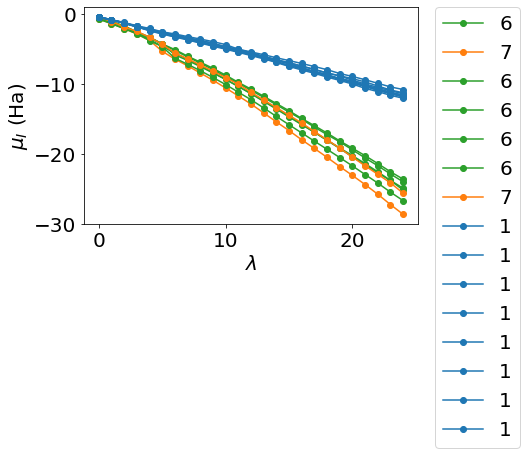

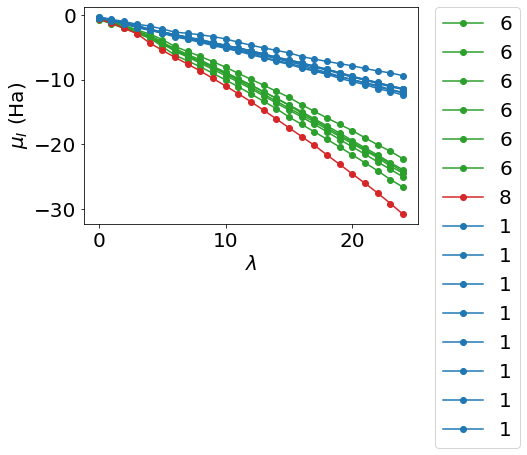

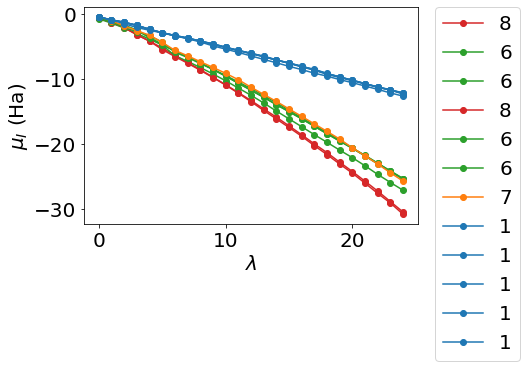

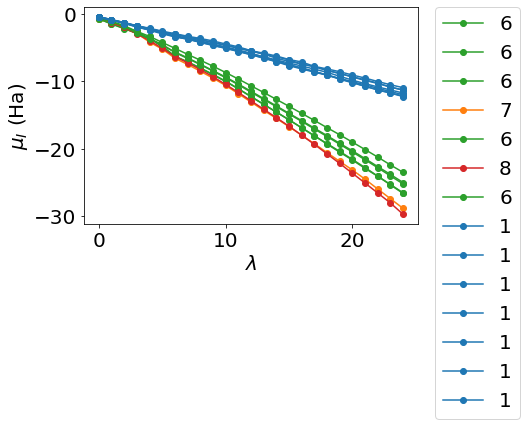

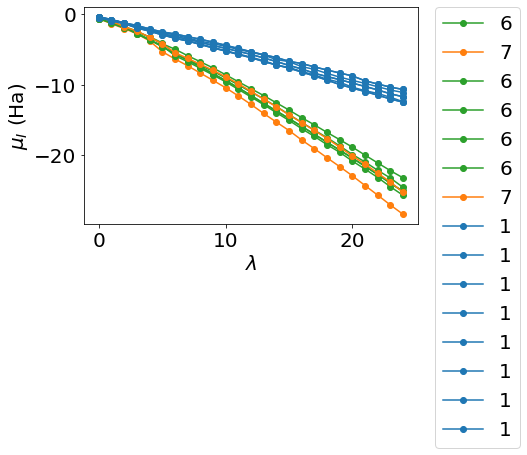

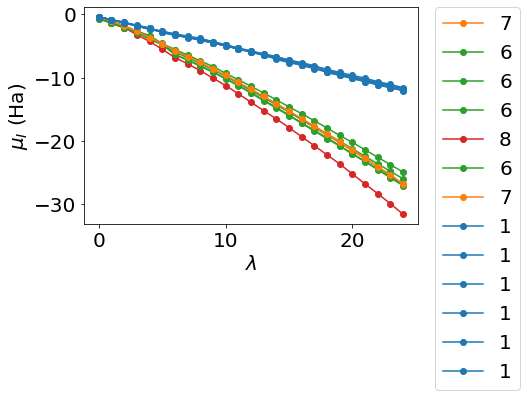

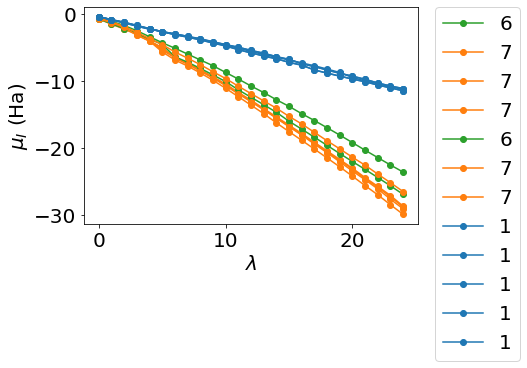

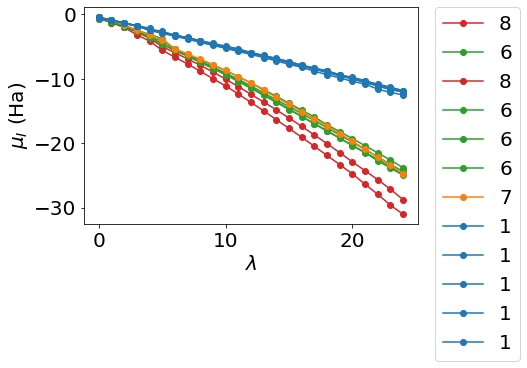

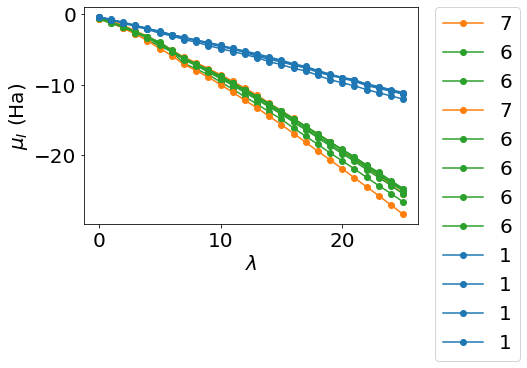

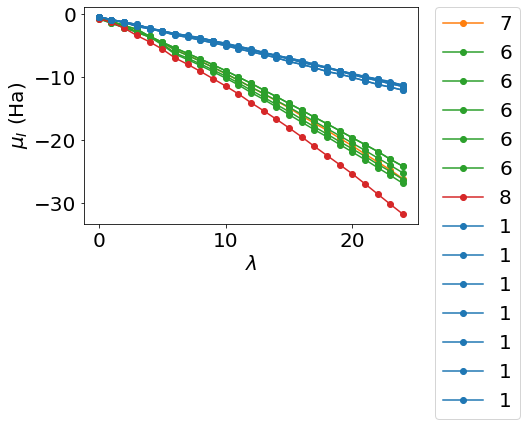

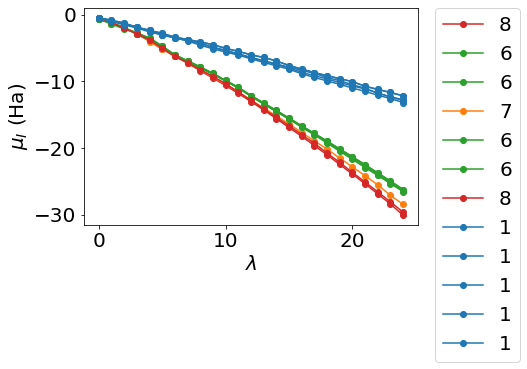

In [18]:
for k in alchpots.keys():
    plot_alchpots(compounds[k], alchpots[k])